We're going to test a volume spreading method in this notebook

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pcraster as pcr
import numpy as np
from hydrotools import gis

ldd_map = r'd:\projects\1220657-Afghanistan\rhine_toy\staticmaps\wflow_ldd.map'
dem_map = r'd:\projects\1220657-Afghanistan\rhine_toy\staticmaps\wflow_dem.map'
catch_map = r'd:\projects\1220657-Afghanistan\rhine_toy\staticmaps\wflow_catchment.map'

In [5]:
ldd = pcr.readmap(ldd_map)
dem = pcr.readmap(dem_map)
catch = pcr.readmap(catch_map)
ldd = pcr.ifthen(pcr.boolean(catch), ldd)
dem = pcr.ifthen(pcr.boolean(catch), dem)
# make a subcatchment map
stream_ge, subcatch = gis.subcatch_stream(ldd, 5)

pcr.report(stream_ge, 'stream.map')
# stream_ge, subcatch_4 = gis.subcatch_stream(ldd, 2)

hand, dist = gis.derive_HAND(dem, ldd, 3000, rivers=stream_ge)
pcr.report(hand, 'hand.map')

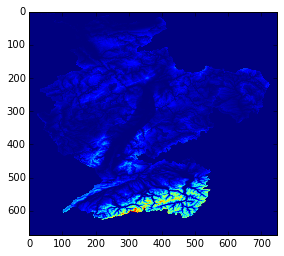

In [6]:
plt.imshow(pcr.pcr2numpy(hand, 0))

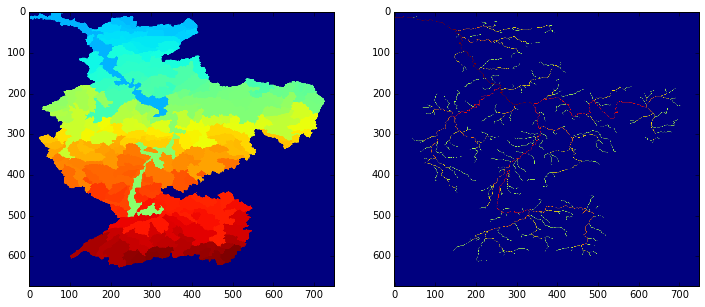

In [7]:
subcatch = pcr.ordinal(pcr.scalar(subcatch) + 1)
plt.figure(figsize(12,6))
plt.subplot(121)
plt.imshow(pcr.pcr2numpy(subcatch, -100))
plt.subplot(122)
plt.imshow(pcr.pcr2numpy(stream_ge, 0))
pcr.report(subcatch, 'subcatch.map')

In [8]:
# now make a volume map, each cell with more than xx amount of upstream cells receives some flood volume

<matplotlib.colorbar.Colorbar instance at 0x0000000020D02A08>

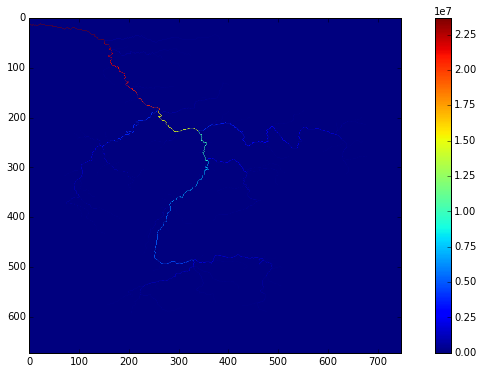

In [18]:
volume = pcr.ifthenelse(stream_ge > 0, pcr.accuflux(ldd, 100), 0)
plt.imshow(pcr.pcr2numpy(volume, 0))
plt.colorbar()

In [19]:
# now we have some nice volume. Now we need to redistribute!
inundation = gis.volume_spread(ldd, hand, subcatch, volume, volume_thres=0., area_multiplier=12e9, iterations=15)


<matplotlib.colorbar.Colorbar instance at 0x0000000022D0C808>

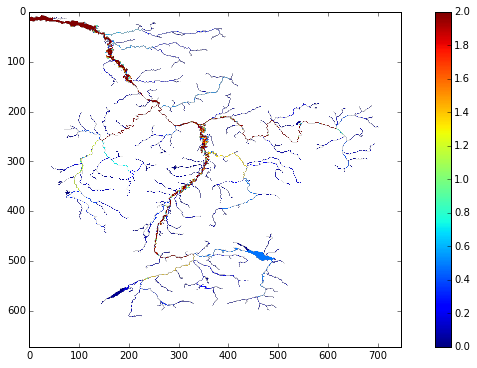

In [23]:
plt.imshow(np.ma.masked_where(pcr.pcr2numpy(inundation, 0)==0, pcr.pcr2numpy(inundation, 0)), vmax=2)
plt.colorbar()

In [17]:
pcr.report(inundation, 'inun.map')